Este notebook fue utilizado para realizar los gráficos y facilitar la ejecución del los códigos secuenciales y en paralelo

Por algún motivo utilizar "subprocess" para correr los ejecutables reporta problemas, a pesar de que el código corra perfectamente, para esto se corrió el código en un "try" y se puede observar que no tiene problemas reales al leer el output en el "except"

In [63]:
#Sequential run
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

iterations = '100000000'
size = '128'
Trange = ['0.5','2.0','4.0']
save_step = '100000'

Xdata = []
YAdata = []
YBdata = []
Cdata = []

for i, temp in enumerate(Trange):
    try:
        output = subprocess.check_output([".\IsingSequential.exe", iterations, size, temp, save_step], text=True,)
        print(f"Sequential execution:\n{output}")
    except subprocess.CalledProcessError as e:
        print(f"Sequential execution (supposedly an error):\n{e.output}")
    dataSequential = pd.read_csv('IsingFile.csv')
    Xdata.append(dataSequential['Iteration'])
    YAdata.append(dataSequential['Energy'])
    YBdata.append(dataSequential['Magnetization'])
    dataField = np.loadtxt('IsingField.csv',skiprows=1,delimiter=',')
    Cdata.append(dataField.reshape((int(iterations)//int(save_step),int(size),int(size))))

Sequential execution (supposedly an error):
Iterations: 100000000
Side size: 128
Temperature: 0.500000
Save every 100000 steps
Data saved to file, execution succesfull

Sequential execution (supposedly an error):
Iterations: 100000000
Side size: 128
Temperature: 2.000000
Save every 100000 steps
Data saved to file, execution succesfull

Sequential execution (supposedly an error):
Iterations: 100000000
Side size: 128
Temperature: 4.000000
Save every 100000 steps
Data saved to file, execution succesfull



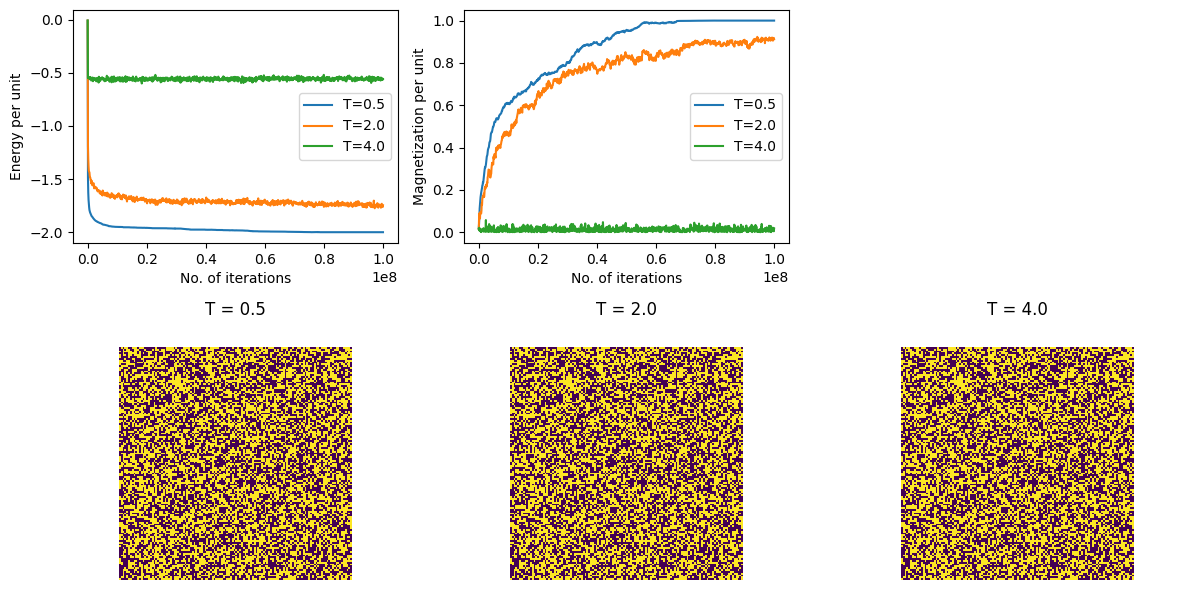

In [68]:
#Sequential animated plot
import matplotlib.animation as animation
import matplotlib.pyplot as plt

IPF = 10 #Iterations per frame
FRAMES = int(len(Xdata[0])/IPF)
N = int(size)

fig, ax = plt.subplots(2,3,figsize=(12,6),dpi=100)
plotA = []
plotB = []
plotC = []
for t, temp in enumerate(Trange):
    plotA.append(ax[0,0].plot(Xdata[t],YAdata[t],label=f'T={temp}')[0])
    plotB.append(ax[0,1].plot(Xdata[t],YBdata[t],label=f'T={temp}')[0])
    plotC.append(ax[1,t].matshow(Cdata[t][0]))
    ax[1,t].set_title(f'T = {temp}')
    ax[1,t].axis('off')

    
ax[0,0].set_xlabel('No. of iterations')
ax[0,1].set_xlabel('No. of iterations')
ax[0,0].set_ylabel('Energy per unit')
ax[0,1].set_ylabel('Magnetization per unit')
ax[0,0].legend()
ax[0,1].legend()
ax[0,2].axis('off')
fig.tight_layout()
plt.show()

#Function to change data of every frame
def animate(i):
    it = i*IPF
    for t, temp in enumerate(Trange):
        plotA[t].set_data(Xdata[t][:it],YAdata[t][:it])
        plotB[t].set_data(Xdata[t][:it],YBdata[t][:it])
        plotC[t].set_data(Cdata[t][it])
    return plotA,plotB,plotC

anim = animation.FuncAnimation(fig, animate, frames=FRAMES,
                                interval=100, repeat_delay=3000)

anim.save('SequentialEvolution.gif',writer='pillow')

In [41]:
#Parallel run

import subprocess
import time

iterations = "200"
temperature = "1.0"
size = "128"
processes = ["1","2","4","8"]
times = processes
for i, p in enumerate(processes):
    t0 = time.time()
    try:
        output = subprocess.check_output([".\IsingParallel.exe", iterations, size, temperature, p], text=True,)
        print(f"Parallel execution:\n{output}")
    except subprocess.CalledProcessError as e:
        print(f"Parallel execution (supposedly an error):\n{e.output}")
    times[i] = time.time() - t0
    print(f"Time in {p} processes: {times[i]}s\n")


Parallel execution (supposedly an error):
Iterations: 200
Side size: 128
Temperature: 1.000000
Number of processes: 1
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Time in 1 processes: 0.2973313331604004s

Parallel execution (supposedly an error):
Iterations: 200
Side size: 128
Temperature: 1.000000
Number of processes: 2
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Time in 2 processes: 0.16922283172607422s

Parallel execution (supposedly an error):
Iterations: 200
Side size: 128
Temperature: 1.000000
Number of processes: 4
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Time in 4 processes: 0.10483789443969727s

Parallel execution (supposedly an error):
Iterations: 200
Side size: 128
Temperature: 1.000000
Number of processes: 8
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Time in 8 processes: 0.09078216552734375s



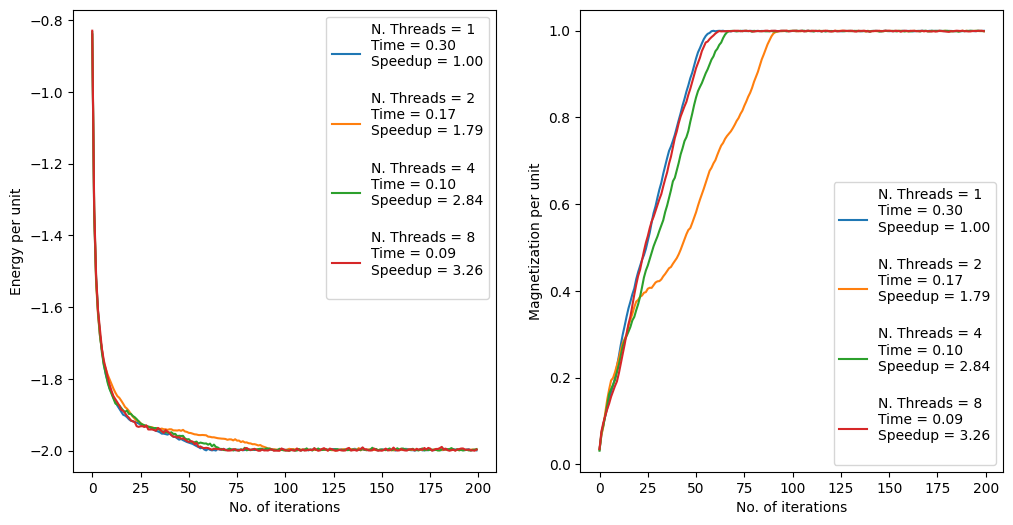

In [195]:
#Parallel plot
dataParallel1 = pd.read_csv('IsingFileParallel1P.csv')
dataParallel2 = pd.read_csv('IsingFileParallel2P.csv')
dataParallel4 = pd.read_csv('IsingFileParallel4P.csv')
dataParallel8 = pd.read_csv('IsingFileParallel8P.csv')

X1data = dataParallel1['Iteration']
Y1Adata = dataParallel1['Energy']
Y1Bdata = dataParallel1['Magnetization']
X2data = dataParallel2['Iteration']
Y2Adata = dataParallel2['Energy']
Y2Bdata = dataParallel2['Magnetization']
X4data = dataParallel4['Iteration']
Y4Adata = dataParallel4['Energy']
Y4Bdata = dataParallel4['Magnetization']
X8data = dataParallel8['Iteration']
Y8Adata = dataParallel8['Energy']
Y8Bdata = dataParallel8['Magnetization']

fig, ax = plt.subplots(1,2,figsize=(12,6),dpi=100)

plot1A = ax[0].plot(X1data,Y1Adata,label=f'N. Threads = 1\nTime = {times[0]:.2f}\nSpeedup = {times[0]/times[0]:.2f}\n')[0]
plot1B = ax[1].plot(X1data,Y1Bdata,label=f'N. Threads = 1\nTime = {times[0]:.2f}\nSpeedup = {times[0]/times[0]:.2f}\n')[0]
plot2A = ax[0].plot(X2data,Y2Adata,label=f'N. Threads = 2\nTime = {times[1]:.2f}\nSpeedup = {times[0]/times[1]:.2f}\n')[0]
plot2B = ax[1].plot(X2data,Y2Bdata,label=f'N. Threads = 2\nTime = {times[1]:.2f}\nSpeedup = {times[0]/times[1]:.2f}\n')[0]
plot4A = ax[0].plot(X4data,Y4Adata,label=f'N. Threads = 4\nTime = {times[2]:.2f}\nSpeedup = {times[0]/times[2]:.2f}\n')[0]
plot4B = ax[1].plot(X4data,Y4Bdata,label=f'N. Threads = 4\nTime = {times[2]:.2f}\nSpeedup = {times[0]/times[2]:.2f}\n')[0]
plot8A = ax[0].plot(X8data,Y8Adata,label=f'N. Threads = 8\nTime = {times[3]:.2f}\nSpeedup = {times[0]/times[3]:.2f}\n')[0]
plot8B = ax[1].plot(X8data,Y8Bdata,label=f'N. Threads = 8\nTime = {times[3]:.2f}\nSpeedup = {times[0]/times[3]:.2f}\n')[0]
ax[0].set_xlabel('No. of iterations')
ax[1].set_xlabel('No. of iterations')
ax[0].set_ylabel('Energy per unit')
ax[1].set_ylabel('Magnetization per unit')
ax[0].legend()
ax[1].legend()
plt.show()

In [187]:
#Run for temperatures from 0.1 to 2.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import os


Trange = np.arange(0.1,2.1,0.1)
iterations = "20000"
size = "128"
p = "8"
Xdata = []
YAdata = []
YBdata = []

for i, temp in enumerate(Trange):
    try:
        output = subprocess.check_output([".\IsingParallel.exe", iterations, size, f"{temp:.1f}", p], text=True,)
        print(f"Parallel execution:\n{output}")
    except subprocess.CalledProcessError as e:
        print(f"Parallel execution (supposedly an error):\n{e.output}")
    dataParallel = pd.read_csv('IsingFileParallel'+p+'P.csv')
    Xdata.append(dataParallel['Iteration'])
    YAdata.append(dataParallel['Energy'])
    YBdata.append(dataParallel['Magnetization'])


Parallel execution (supposedly an error):
Iterations: 20000
Side size: 128
Temperature: 0.100000
Number of processes: 8
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Parallel execution (supposedly an error):
Iterations: 20000
Side size: 128
Temperature: 0.200000
Number of processes: 8
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Parallel execution (supposedly an error):
Iterations: 20000
Side size: 128
Temperature: 0.300000
Number of processes: 8
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Parallel execution (supposedly an error):
Iterations: 20000
Side size: 128
Temperature: 0.400000
Number of processes: 8
Metropolis-Hastings simulation completed
Data saved to file, execution succesfull

Parallel execution (supposedly an error):
Iterations: 20000
Side size: 128
Temperature: 0.500000
Number of processes: 8
Metropolis-Hastings simulation completed
Data saved to file, executi

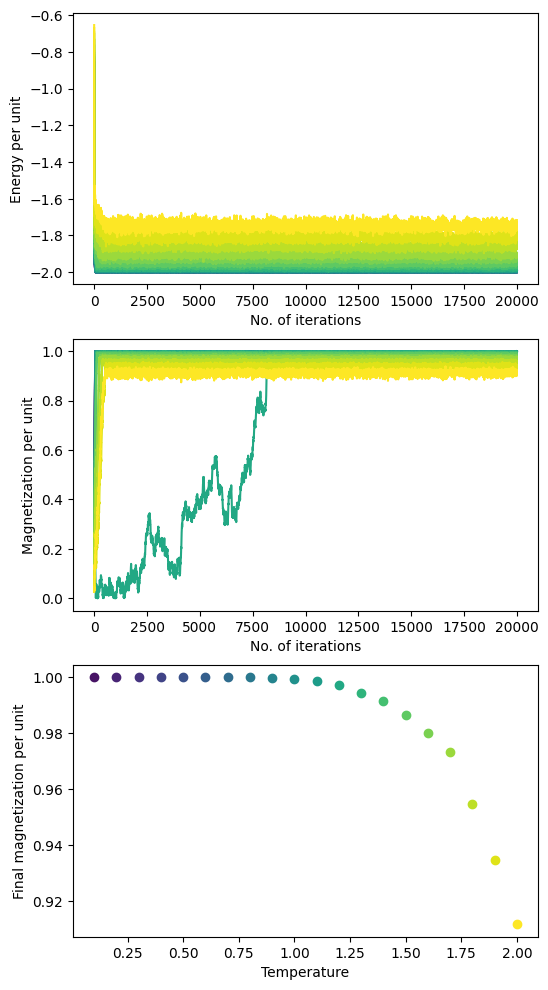

In [188]:
#Plot for temperatures from 0.1 to 2.0

from matplotlib import colormaps
fig, ax = plt.subplots(3,1,figsize=(6,12),dpi=100)

for i, temp in enumerate(Trange):
    ax[0].plot(Xdata[i],YAdata[i],color=colormaps['viridis'](temp/2))
    ax[1].plot(Xdata[i],YBdata[i],color=colormaps['viridis'](temp/2))
    ax[2].scatter(temp,np.mean(YBdata[i][-20:]),color=colormaps['viridis'](temp/2))
ax[0].set_xlabel('No. of iterations')
ax[1].set_xlabel('No. of iterations')
ax[2].set_xlabel('Temperature')
ax[0].set_ylabel('Energy per unit')
ax[1].set_ylabel('Magnetization per unit')
ax[2].set_ylabel('Final magnetization per unit')
plt.show()